   age  income      gender  time_spent preferred_platform   interests  \
0   51   94413      female         4.5           Facebook      Sports   
1   64   87851      female         1.0           Facebook  Technology   
2   41   68087      female         4.5          Instagram        Food   
3   27   30988        male         5.0          Instagram       Music   
4   55   79214  non-binary         1.0          Instagram      Sports   

  demographics  posts_per_week  exercise_hours  
0     Suburban               7             5.5  
1        Urban              14             8.0  
2        Rural               1            10.0  
3        Urban               3             7.0  
4        Rural              11             4.5  
                age        income  gender   time_spent preferred_platform  \
count   2000.000000   2000.000000    2000  2000.000000               2000   
unique          NaN           NaN       3          NaN                  5   
top             NaN           NaN  f

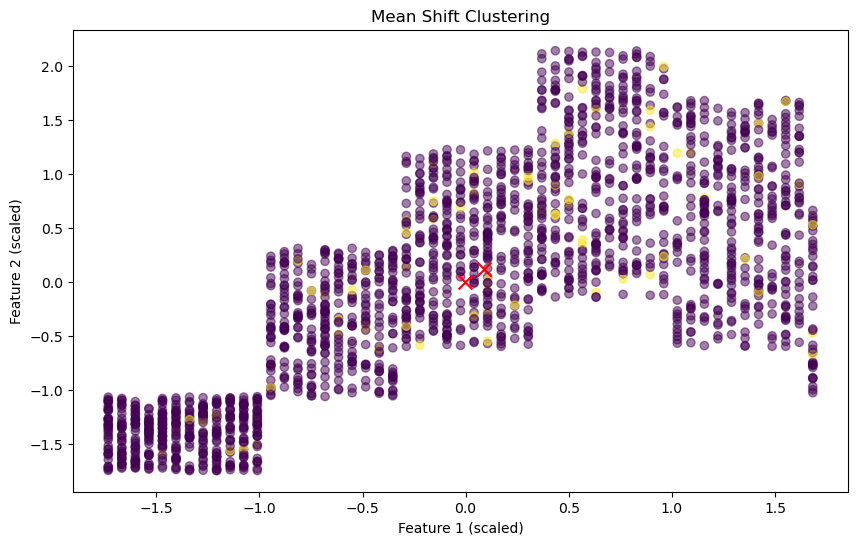

In [1]:
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'Updated_Social_Media_Usage_Data.csv'
data = pd.read_csv(data_path)

# Display data summary
print(data.head())
print(data.describe(include='all'))
print(data.isnull().sum())

# Preprocess the data
# Identify categorical columns if they exist
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Estimate the bandwidth for the Mean Shift algorithm
bandwidth = estimate_bandwidth(scaled_data, quantile=0.2, n_samples=500)

# Create the Mean Shift model
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(scaled_data)

# Cluster centers and labels
cluster_centers = mean_shift.cluster_centers_
labels = mean_shift.labels_

# Evaluate the model
silhouette = silhouette_score(scaled_data, labels)
print(f'Silhouette Score: {silhouette}')

# Plot the cluster centers to understand the mean shift centroids in two dimensions
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, marker='x')  # Mark cluster centers
plt.title('Mean Shift Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# Prediction function
def predict_social_media_type(new_data):
    new_data_scaled = scaler.transform(new_data)
    return mean_shift.predict(new_data_scaled)

# Example usage
# Assuming 'new_data' is a DataFrame with the same structure as the input data (excluding the target feature)
# example_new_data = pd.DataFrame(...)
# social_media_type = predict_social_media_type(example_new_data)
# print(social_media_type)


NameError: name 'np' is not defined

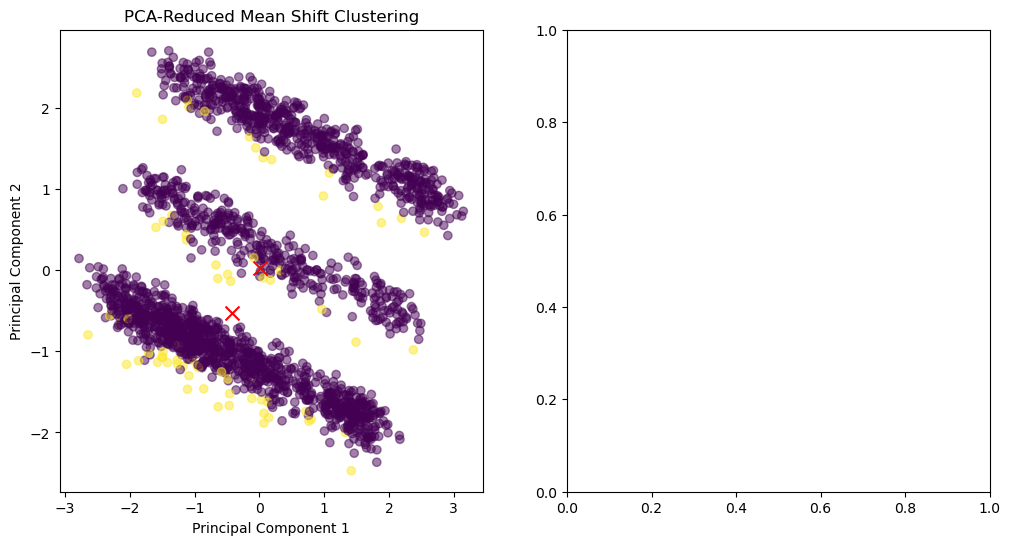

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load and preprocess the data as before
data_path = 'Updated_Social_Media_Usage_Data.csv'
data = pd.read_csv(data_path)
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Estimate bandwidth and create Mean Shift model
bandwidth = estimate_bandwidth(scaled_data, quantile=0.2, n_samples=500)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(scaled_data)

# Apply PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Cluster centers transformed by PCA
cluster_centers_pca = pca.transform(mean_shift.cluster_centers_)

# Plot the original clusters with PCA dimensions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # First plot
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=mean_shift.labels_, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=100, marker='x')
plt.title('PCA-Reduced Mean Shift Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Let's also plot the cumulative variance explained by the PCA components to justify the use of 2D PCA
plt.subplot(1, 2, 2)  # Second plot
pca_full = PCA(n_components=min(scaled_data.shape[1], scaled_data.shape[0]))
pca_full.fit(scaled_data)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()
